In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA
import pandas as pd



In [52]:
# Get tweets csv data and drop irrelevant columns
local_path='data/Tweets_Preprocessed/df_tsla_aapl_features_added.csv'
df = pd.read_csv(local_path) 
df = vader_tweet_sentiment(df).drop(['location', 'name', 'username'], axis=1)
df.head()

,author_id,created_at,created_at_user,public_metrics_followers_count,public_metrics_following_count,public_metrics_like_count,public_metrics_listed_count,public_metrics_quote_count,public_metrics_reply_count,public_metrics_retweet_count,...,Word_count_Henry08_neg,Word_count_LM11_pos,Word_count_LM11_neg,Word_count_Hagenau13_pos,Word_count_Hagenau13_neg,News_agencies_names_count,Compound_vader,Positive_vader,Negative_vader,Neutral_vader
0,187896454,2018-12-31T23:59:31.000Z,2010-09-07T12:49:16.000Z,39249,42551,2,298,0,0,1,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.5423,0.089,0.000,0.911
1,19593572,2018-12-31T23:58:57.000Z,2009-01-27T14:21:12.000Z,25631,26385,0,577,0,0,2,...,0.0,0.0,0.007143,0.0,0.0,0.0,0.2705,0.197,0.103,0.699
2,996125781620330500,2018-12-31T23:58:40.000Z,2018-05-14T20:31:08.000Z,148,195,2,4,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,-0.6249,0.000,0.338,0.662
3,819956834232508416,2018-12-31T23:55:59.000Z,2017-01-13T17:18:38.000Z,12,31,1,2,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.2960,0.196,0.000,0.804
4,1072443924566822912,2018-12-31T23:55:19.000Z,2018-12-11T10:52:11.000Z,113,641,0,6,0,0,34,...,0.0,0.0,0.013333,0.0,0.0,0.0,-0.9451,0.000,0.792,0.208


In [58]:
# Get the length of each text, number of hashtags, and number of stocks
df['text_length'] = df['text'].apply(len)
df['stocks_mentioned_count']=df['Mentioned_stocks_S&P500'].apply(len)+df['Mentioned_stocks_S&P500'].apply(len)
#df['hashtag_count']= df['hashtag'].apply(len)

## Number of Followers and Following Effects on Popularity
In the below subsection, we explore the number of followings and number of followers statistics. Moreover, we visualize and study the underlying effects that each has respectively on the resulting popularity of the tweet. 

Text(0, 0.5, 'Number of followings within specified range')

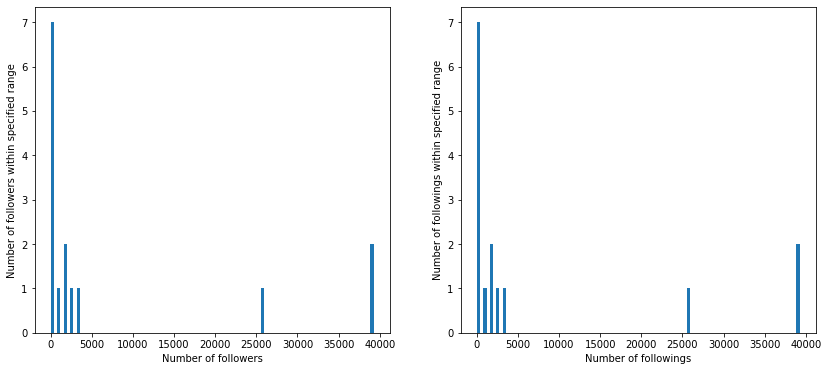

In [79]:
#Histogram plots of followers and following counts
fig, ax = plt.subplots(1,2, figsize=(14, 6))
ax[0].hist(df['public_metrics_followers_count'], bins=100)
ax[0].set_xlabel("Number of followers")
ax[0].set_ylabel("Number of followers within specified range")

ax[1].hist(df['public_metrics_followers_count'], bins=100)
ax[1].set_xlabel("Number of followings")
ax[1].set_ylabel("Number of followings within specified range")




Text(0.5, 0, 'Number of followings')

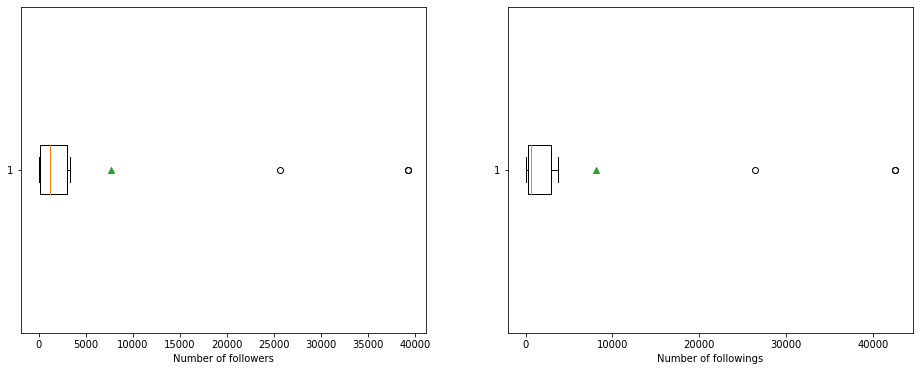

In [109]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].boxplot(df['public_metrics_followers_count'], vert= False, showmeans=True)
ax[0].set_xlabel("Number of followers")
ax[1].boxplot(df['public_metrics_following_count'], vert= False, showmeans=True)
ax[1].set_xlabel("Number of followings")

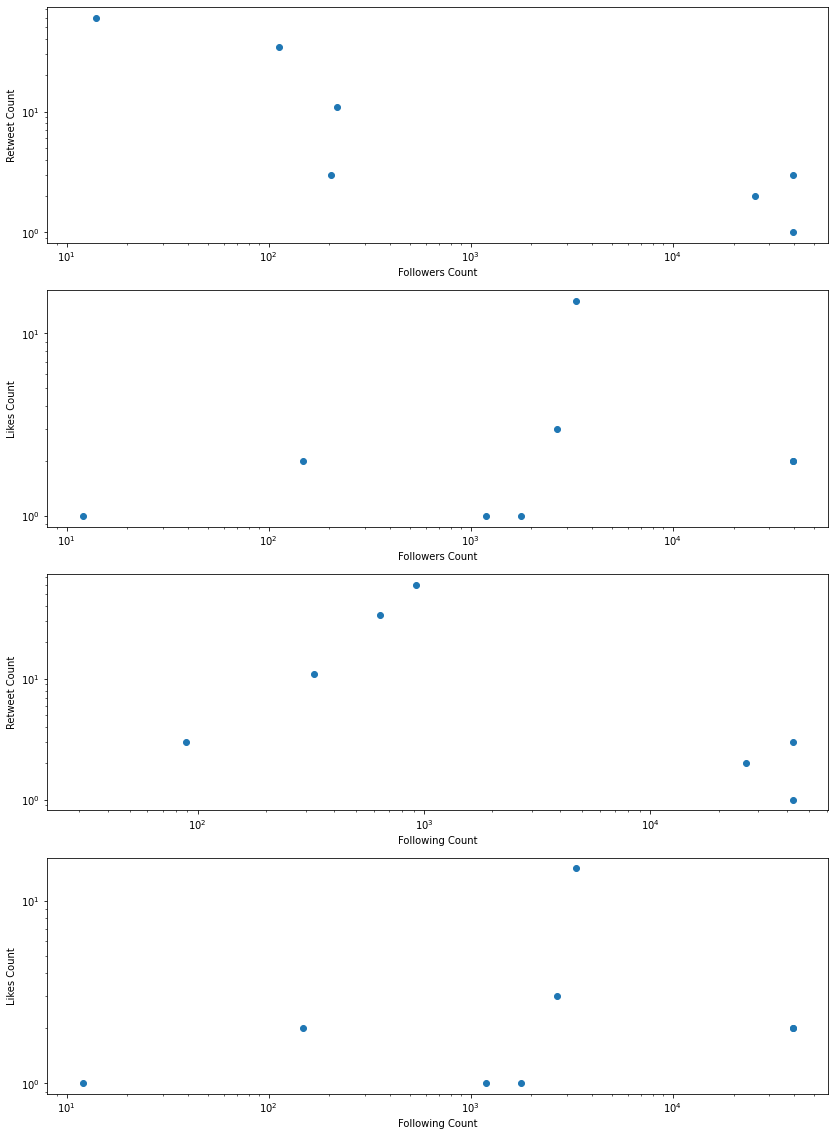

In [74]:
#Plot number of followers vs retweet count and vs likes count
fig, ax = plt.subplots(4, figsize=(14, 20))

ax[0].scatter(df['public_metrics_followers_count'],df['public_metrics_retweet_count'])
ax[0].set_xlabel("Followers Count")
ax[0].set_ylabel("Retweet Count")
ax[0].set_yscale('log')
ax[0].set_xscale('log')

ax[1].scatter(df['public_metrics_followers_count'],df['public_metrics_like_count'])
ax[1].set_xlabel("Followers Count")
ax[1].set_ylabel("Likes Count")
ax[1].set_yscale('log')
ax[1].set_xscale('log')

ax[2].scatter(df['public_metrics_following_count'],df['public_metrics_retweet_count'])
ax[2].set_xlabel("Following Count")
ax[2].set_ylabel("Retweet Count")
ax[2].set_yscale('log')
ax[2].set_xscale('log')

ax[3].scatter(df['public_metrics_followers_count'],df['public_metrics_like_count'])
ax[3].set_xlabel("Following Count")
ax[3].set_ylabel("Likes Count")
ax[3].set_yscale('log')
ax[3].set_xscale('log')

Text(0, 0.5, 'Number of likes within specified range')

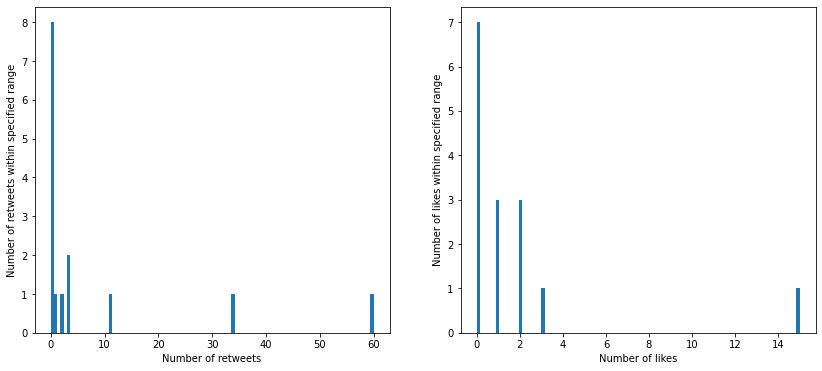

In [80]:
#Histogram plots of retweet and likes distribution
fig, ax = plt.subplots(1,2, figsize=(14, 6))
ax[0].hist(df['public_metrics_retweet_count'], bins=100)
ax[0].set_xlabel("Number of retweets")
ax[0].set_ylabel("Number of retweets within specified range")

ax[1].hist(df['public_metrics_like_count'], bins=100)
ax[1].set_xlabel("Number of likes")
ax[1].set_ylabel("Number of likes within specified range")



## Tweet Length Effects on Popularity
In the below subsection, we study the statistics of tweet length, and we subsequently explore its effect on the resulting popularity of a tweet. 

Text(0, 0.5, 'Text length within specified range')

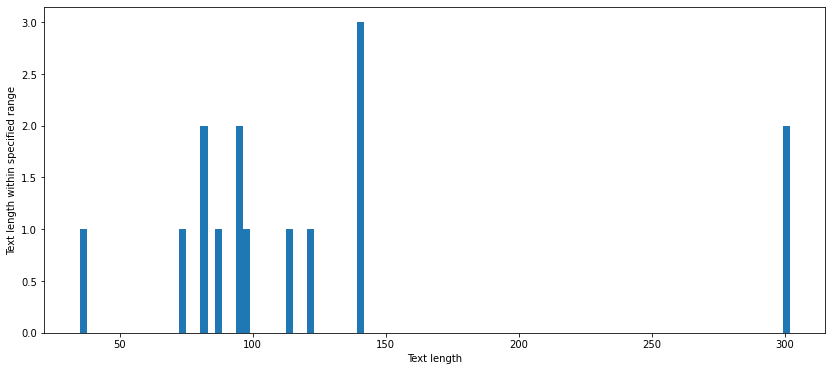

In [99]:
fig, ax = plt.subplots(1, figsize=(14, 6))
ax.hist(df['text_length'], bins=100)
ax.set_xlabel("Text length")
ax.set_ylabel("Text length within specified range")

{'whiskers': [<matplotlib.lines.Line2D at 0x1137787c0>,
 'caps': [<matplotlib.lines.Line2D at 0x113778ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x113778430>],
 'medians': [<matplotlib.lines.Line2D at 0x113779600>],
 'fliers': [<matplotlib.lines.Line2D at 0x113779d20>],
 'means': [<matplotlib.lines.Line2D at 0x113779990>]}

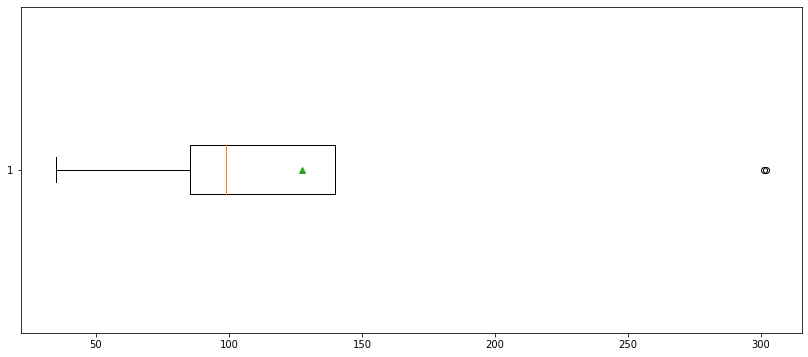

In [90]:
# Box plot of text length statistics
fig, ax = plt.subplots(1, figsize=(14, 6))
ax.boxplot(df['text_length'], vert= False, showmeans=True)

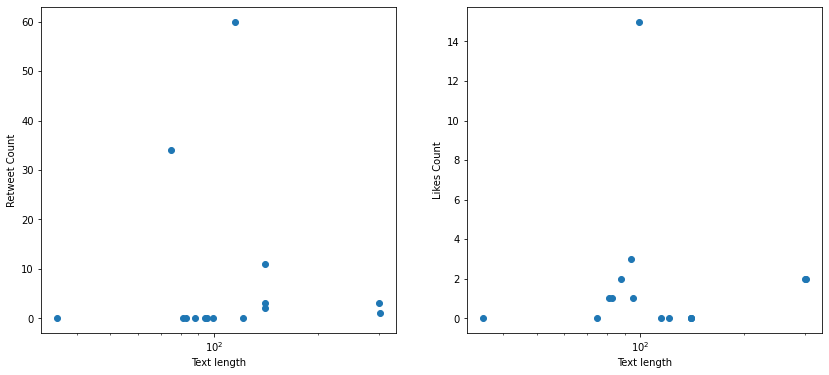

In [101]:
#Plot tweet length vs retweet count and vs likes count 
#Plot number of followers vs retweet count and vs likes count
fig, ax = plt.subplots(1,2, figsize=(14, 6))

ax[0].scatter(df['text_length'],df['public_metrics_retweet_count'])
ax[0].set_xlabel("Text length")

ax[0].set_ylabel("Retweet Count")
#ax[0].set_yscale('log')
ax[0].set_xscale('log')

ax[1].scatter(df['text_length'],df['public_metrics_like_count'])
ax[1].set_xlabel("Text length")
ax[1].set_ylabel("Likes Count")
#ax[1].set_yscale('log')
ax[1].set_xscale('log')

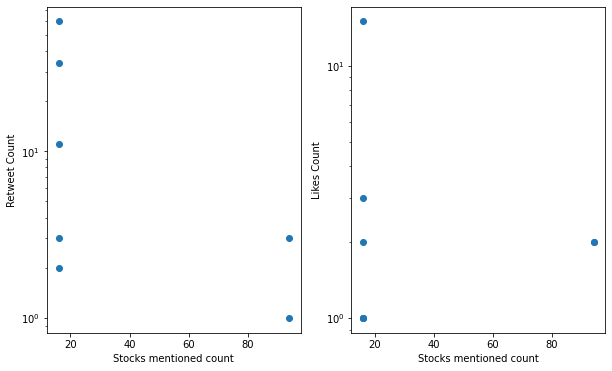

In [68]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))

ax[0].scatter(df['stocks_mentioned_count'],df['public_metrics_retweet_count'])
ax[0].set_xlabel("Stocks mentioned count")
ax[0].set_ylabel("Retweet Count")

ax[1].scatter(df['stocks_mentioned_count'],df['public_metrics_like_count'])
ax[1].set_xlabel("Stocks mentioned count")
ax[1].set_ylabel("Likes Count")



## Tweet Sentiment Effects on Popularity

Text(0, 0.5, 'Compound Vader Score Counts')

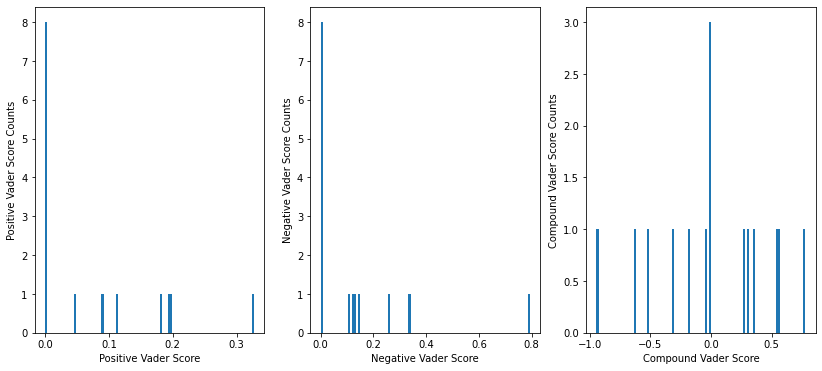

In [105]:
# Plot positive, negative and scoring sentiments in  histogram against retweet count
fig, ax = plt.subplots(1,3, figsize=(14, 6))
ax[0].hist(df['Positive_vader'], bins=100)
ax[0].set_xlabel("Positive Vader Score")
ax[0].set_ylabel("Positive Vader Score Counts")


ax[1].hist(df['Negative_vader'], bins=100)
ax[1].set_xlabel("Negative Vader Score")
ax[1].set_ylabel("Negative Vader Score Counts")

ax[2].hist(df['Compound_vader'], bins=100)
ax[2].set_xlabel("Compound Vader Score")
ax[2].set_ylabel("Compound Vader Score Counts")

Text(0.5, 0, 'Retweet Count')

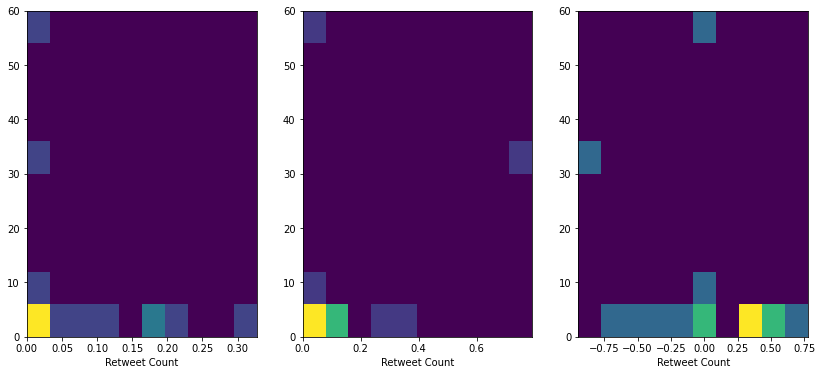

In [111]:
# Plot positive and negative scoring sentiments in 2d histogram against retweet count
fig, ax = plt.subplots(1,3, figsize=(14, 6))
ax[0].hist2d(df['Positive_vader'], df['public_metrics_retweet_count'])
ax[0].set_xlabel("Positive vader score")
ax[0].set_xlabel("Retweet Count")

ax[1].hist2d(df['Negative_vader'], df['public_metrics_retweet_count'])
ax[1].set_xlabel("Negative vader score")
ax[1].set_xlabel("Retweet Count")

ax[2].hist2d(df['Compound_vader'], df['public_metrics_retweet_count'])
ax[2].set_xlabel("Compound vader score")
ax[2].set_xlabel("Retweet Count")



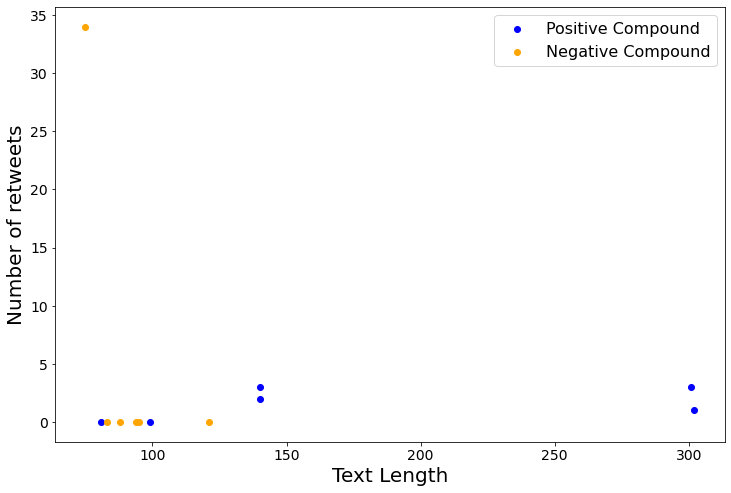

In [107]:
plt.figure(figsize=(12,8))

plt.scatter(df.loc[df['Compound_vader']>0].text_length,
               df.loc[df['Compound_vader']>0].public_metrics_retweet_count,
               label="Positive Compound",
               c='blue')
plt.scatter(df.loc[df['Compound_vader']<0].text_length,
               df.loc[df['Compound_vader']<0].public_metrics_retweet_count,
               label="Negative Compound",
               c='orange')


plt.xlabel("Text Length", fontsize=20)
plt.ylabel("Number of retweets", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)



In [51]:
analyser = SIA()


def vader_tweet_sentiment(tweetframe):
    """
    This function computes the sentiment scores for a dataframe
    with pre-processed tweets
    :param tweetframe: dataframe with text info
    :return: A data frame with sentiment scores added
    """
    scores = []
    # Declaring the variables used for scoring
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Get the compound positive, neutral, and negative sentiment
    # scores for the tweet dataframe
    for i in range(tweetframe['text'].shape[0]):
        compound = analyser.polarity_scores(tweetframe['text'][i])['compound']
        pos = analyser.polarity_scores(tweetframe['text'][i])['pos']
        neu = analyser.polarity_scores(tweetframe['text'][i])['neu']
        neg = analyser.polarity_scores(tweetframe['text'][i])['neg']
        scores.append({"Compound_vader": compound,
                       "Positive_vader": pos,
                       "Negative_vader": neg,
                       "Neutral_vader": neu})
    # Convert the Vader sentiment scores into a dataframe
    sentiment_scores = pd.DataFrame.from_dict(scores)
    tweetframe = tweetframe.join(sentiment_scores)
    return tweetframe